In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv(r'C:\Users\user\workspace\c11\Python\data\gdp_percapita.csv')

In [3]:
gdp_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [5]:
gdp_df.shape

(8219, 4)

8219 rows, 4 columns

In [6]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Country or Area - object, Year - int64, Value - float64, Value Footnotes - float64

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [9]:
gdp_df.Year.value_counts()

Year
2020    247
2021    247
2013    247
2016    247
2019    247
2018    247
2017    247
2014    247
2015    247
2022    246
2011    246
2012    246
2009    245
2010    245
2008    244
2007    242
2006    242
2005    241
2003    241
2004    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

In [10]:
gdp_df.Country.value_counts()

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In [11]:
type_counts = gdp_df.Country.value_counts()

In [12]:
type_counts.head()

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
Name: count, dtype: int64

In [13]:
type(type_counts)

pandas.core.series.Series

In [14]:
type_counts = type_counts.to_frame()

In [15]:
type(type_counts)

pandas.core.frame.DataFrame

In [16]:
type_counts.head(2)

,count
Country,
Africa Eastern and Southern,34
Africa Western and Central,34


In [17]:
type_counts = type_counts.reset_index()
type_counts

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [18]:
type_counts.sort_values(by = 'count', ascending = False)

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [19]:
gdp_df.isnull().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [20]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [21]:
countries_data_missing = (type_counts["count"] < 34).sum()
print(countries_data_missing)

19


19 countries with missing year data

In [22]:
countries_complete = (type_counts["count"] == 34).sum()
print(countries_complete)

228


228 countries no missing year data

In [23]:
graph_year = [2020]

In [24]:
gdp_2020 = gdp_df.loc[gdp_df.Year.isin(graph_year)]

In [25]:
type(gdp_2020)

pandas.core.frame.DataFrame

In [26]:
gdp_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


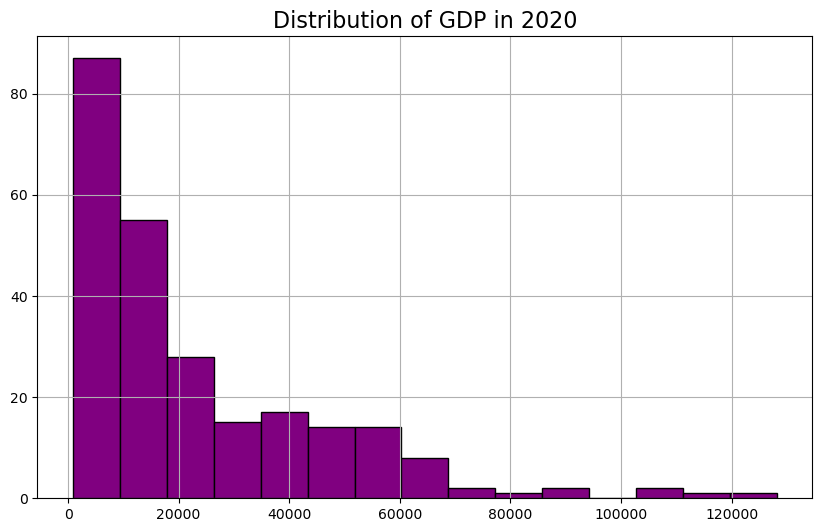

In [27]:
gdp_2020['GDP_Per_Capita'].hist(bins = 15, color = 'purple', edgecolor = 'black', figsize = (10,6))
plt.title('Distribution of GDP in 2020', fontsize = 16);

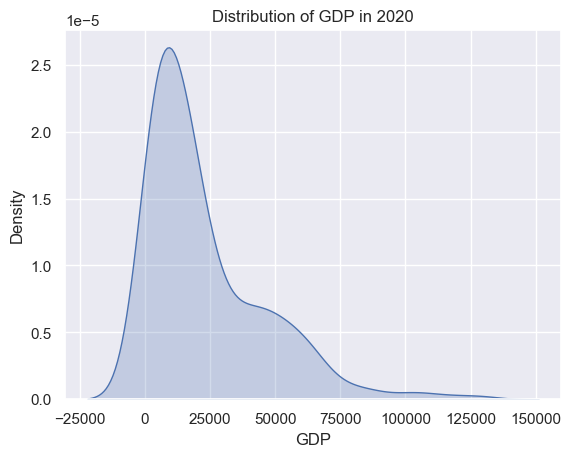

In [28]:
sns.set_theme(style='darkgrid')
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.title('Distribution of GDP in 2020')
plt.xlabel('GDP')
plt.show()

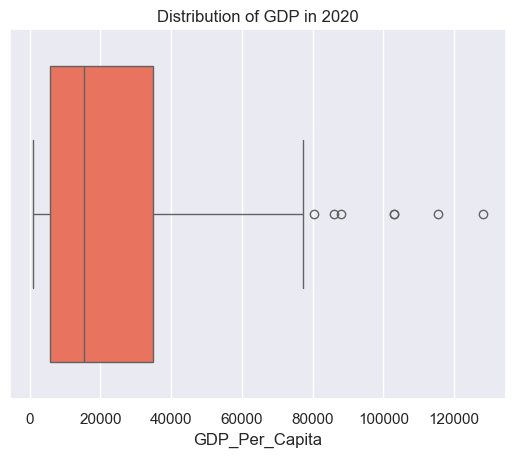

In [29]:
sns.boxplot(data=gdp_2020, x='GDP_Per_Capita', color = 'tomato')
plt.title('Distribution of GDP in 2020')
plt.show()

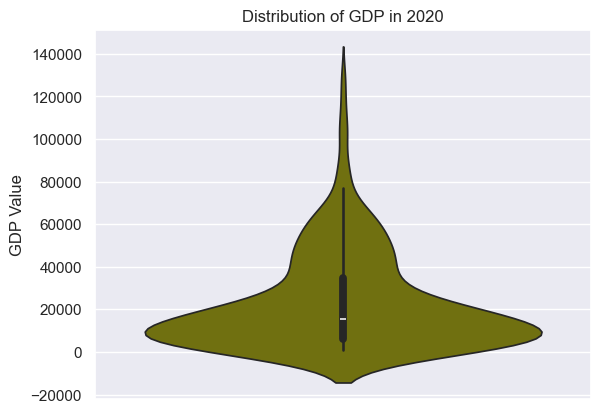

In [30]:
sns.violinplot(y=gdp_2020['GDP_Per_Capita'], color = 'olive')
plt.title('Distribution of GDP in 2020')
plt.ylabel('GDP Value')
plt.show()

In [31]:
gdp_df.describe()

,Year,GDP_Per_Capita
count,8219.000000,8219.000000
mean,2006.672345,20270.976242
std,9.782986,22532.004246
min,1990.000000,510.822823
25%,1998.000000,4284.868430
50%,2007.000000,11916.457927
75%,2015.000000,28543.305542
max,2023.000000,174339.077325


Median GDP 11916.457927

In [32]:
gdp_decades = [1990, 2000, 2010, 2020]

In [33]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin(gdp_decades)]

In [34]:
type(gdp_decades)

pandas.core.frame.DataFrame

In [35]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


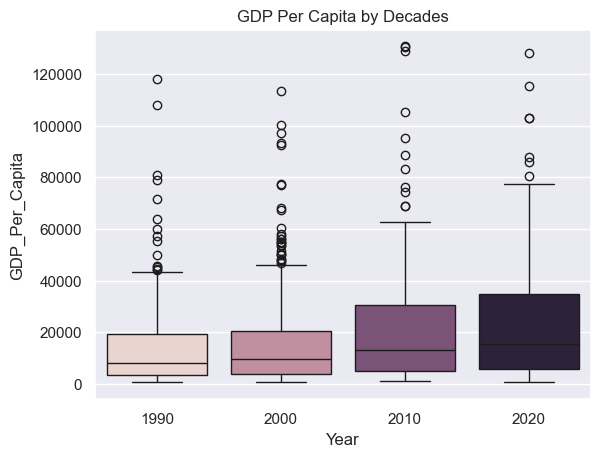

In [36]:
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', hue='Year')
plt.title('GDP Per Capita by Decades')
plt.legend().remove()
plt.show()

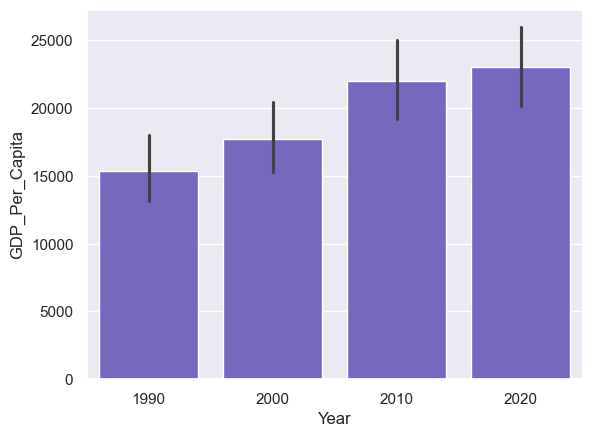

In [37]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, color = 'slateblue')
plt.show()

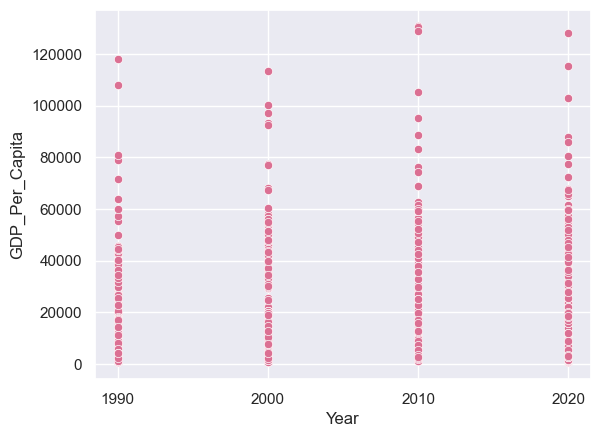

In [38]:
gdp_filtered = gdp_decades.dropna(subset=['GDP_Per_Capita'])
sns.scatterplot(x=gdp_filtered['Year'], y=gdp_filtered['GDP_Per_Capita'], color = 'palevioletred')
plt.xticks(sorted(gdp_filtered['Year'].unique()))
plt.show()

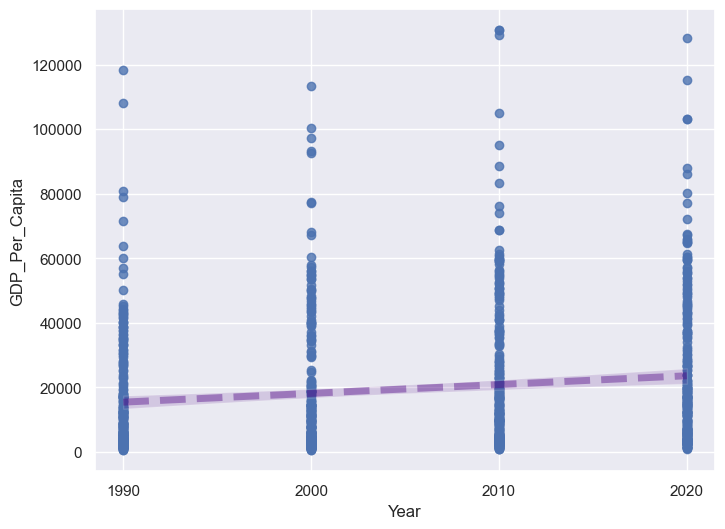

In [39]:
gdp_filtered = gdp_decades.dropna(subset=['GDP_Per_Capita'])
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x=gdp_filtered["Year"], y=gdp_filtered["GDP_Per_Capita"], line_kws={"color": "indigo","alpha": 0.4,"lw": 5,"ls": "--"},ax=ax)
plt.xticks(sorted(gdp_filtered['Year'].unique()))
plt.show()

In [40]:
over_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

In [41]:
first_case = over_100k.sort_values(by="Year", ascending=True).head(1)
print(first_case)

    Country  Year  GDP_Per_Capita
974  Brunei  1990   118163.683198


Brunei first GDP over 100k, in 1990

In [42]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


Luxembourg had highest GDP in 2020

In [43]:
luxembourg_gdp = gdp_decades[gdp_decades['Country']=='Luxembourg']

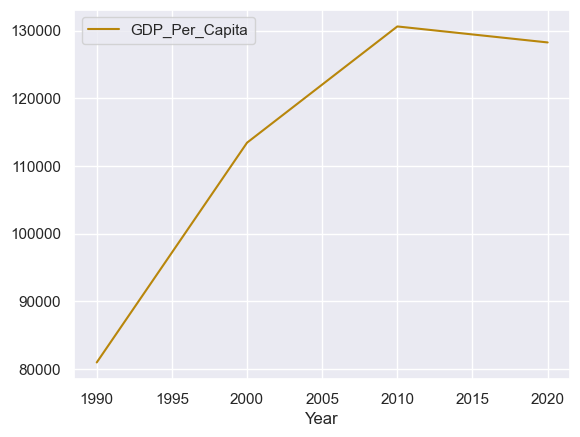

In [44]:
luxembourg_gdp.plot(x='Year', y='GDP_Per_Capita', kind='line', grid=True, color='darkgoldenrod')
plt.show()

In [45]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


Burundi had lowest GDP in 2020

In [46]:
burundi_gdp = gdp_decades[gdp_decades['Country']=='Burundi']

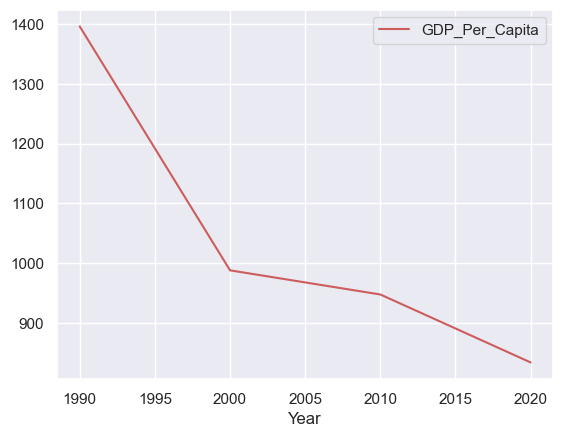

In [47]:
burundi_gdp.plot(x='Year', y='GDP_Per_Capita', kind='line', grid=True, color='indianred')
plt.show()

In [48]:
internet_df = pd.read_csv(r'C:\Users\user\workspace\c11\Python\data\internet_use.csv', nrows=6083)

In [49]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [50]:
internet_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [51]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [52]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [53]:
internet_df.Year.value_counts(ascending=True)

Year
2023     11
1991     39
1992     50
1993     66
1994     92
1995    141
2018    174
1996    177
2022    184
2019    185
2021    186
2020    186
1997    188
1998    195
2013    203
2015    203
2014    204
2017    205
2016    206
1999    207
2003    208
2012    209
2010    209
2000    210
2004    210
2001    212
2005    212
2006    212
2002    214
2011    214
2009    214
2008    214
2007    217
1990    226
Name: count, dtype: int64

very low number of observations for 2023

In [54]:
non_zero = internet_df[internet_df['Internet_Users_Pct'] > 0]

In [55]:
first_year = non_zero.sort_values(by="Year", ascending=True).head(1)
print(first_year)

     Country  Year  Internet_Users_Pct
4197  Norway  1990            0.707299


Norway 1990 had 0.7% internet users

In [56]:
internet_years = (2000, 2014)

In [57]:
internet_years = internet_df.loc[internet_df.Year.isin(internet_years)]

In [58]:
type(internet_years)

pandas.core.frame.DataFrame

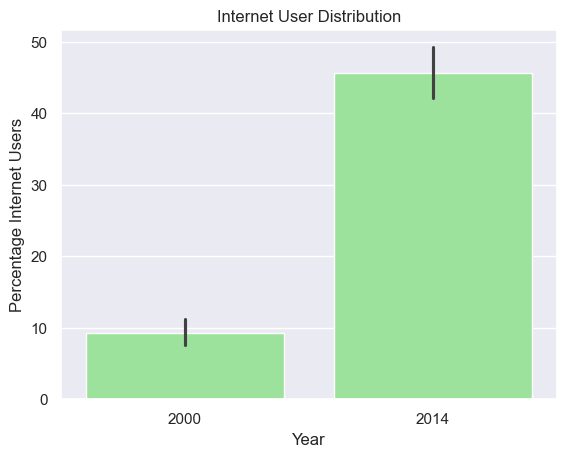

In [59]:
sns.barplot(x='Year', y='Internet_Users_Pct', data=internet_years, color = 'lightgreen')
plt.title('Internet User Distribution')
plt.ylabel('Percentage Internet Users')
plt.show()

Internet users increase from under 10% in 2000 to almost 50% in 2014

In [60]:
under_5_internet_2014 = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]

In [61]:
count_countries = under_5_internet_2014['Country'].nunique()
print("Number of countries with internet users < 5% in 2014:", count_countries)

Number of countries with internet users < 5% in 2014: 10


In [62]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='left')

In [63]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,17.6


In [64]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
8214,Zimbabwe,1994,3965.730986,0.001739
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,0.000000


In [65]:
gdpint2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [66]:
type(gdpint2014)

pandas.core.frame.DataFrame

In [67]:
gdpint2014.shape

(247, 4)

In [68]:
gdpint2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2014,3017.942544,7.0
33,Africa Eastern and Southern,2014,4052.851526,NaN
67,Africa Western and Central,2014,4816.917355,NaN
101,Albania,2014,12788.747231,54.3
135,Algeria,2014,15073.762940,29.5


In [69]:
top3_2014 = gdpint2014.sort_values(by="Internet_Users_Pct", ascending=False).head(3)
print(top3_2014)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
3193  Iceland  2014    57981.199448             98.1580
747   Bermuda  2014    92298.387811             96.8000
5547   Norway  2014    84753.668395             96.3005


In [70]:
top3_facet = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway'])]

In [71]:
type(top3_facet)

pandas.core.frame.DataFrame

In [72]:
top3_facet.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
738,Bermuda,2023,98041.688721,NaN
739,Bermuda,2022,98057.447098,NaN
740,Bermuda,2021,92276.234605,NaN
741,Bermuda,2020,87894.401174,NaN
742,Bermuda,2019,94755.432811,NaN


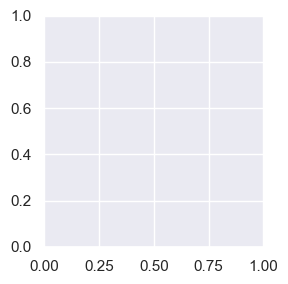

In [73]:
sns.FacetGrid(top3_facet);

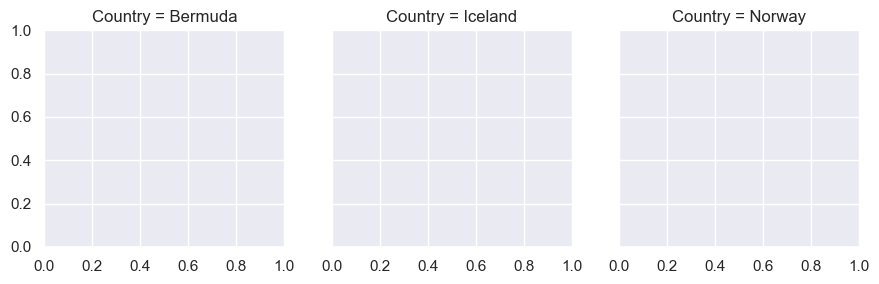

In [74]:
sns.FacetGrid(top3_facet, col = "Country");

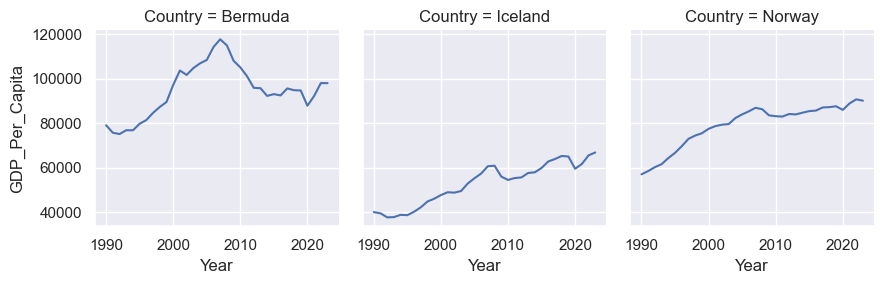

In [75]:
g=sns.FacetGrid(top3_facet, col = "Country")
g.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita");

relatively steady GDP increase in Iceland and Norway over time, Bermuda much higher to start than other two, not much higher in 2020 but had a big spike around 2008

In [76]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [78]:
gdp_and_internet_use_2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2014,3017.942544,7.0
33,Africa Eastern and Southern,2014,4052.851526,NaN
67,Africa Western and Central,2014,4816.917355,NaN
101,Albania,2014,12788.747231,54.3
135,Algeria,2014,15073.762940,29.5


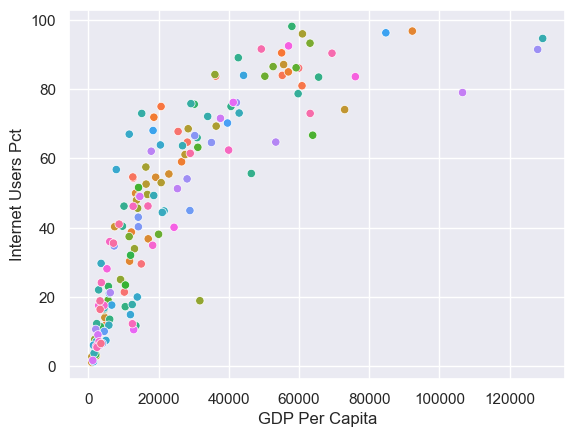

In [86]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="GDP_Per_Capita", y="Internet_Users_Pct", hue="Country")
plt.legend().remove()
plt.xlabel("GDP Per Capita")
plt.ylabel("Internet Users Pct");

internet usage generally increases as GDP does, but some countries with low GDP still see high internet usage whereas all countries with the highest GDP also have high internet usage

In [80]:
gdp_and_internet_use_2014.loc[:, "GDP_group"] = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], q=3, labels=["Low", "Medium", "High"])

In [81]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
9,Afghanistan,2014,3017.942544,7.0,Low
33,Africa Eastern and Southern,2014,4052.851526,NaN,Low
67,Africa Western and Central,2014,4816.917355,NaN,Low
101,Albania,2014,12788.747231,54.3,Medium
135,Algeria,2014,15073.762940,29.5,Medium


In [84]:
median_internet_users = (gdp_and_internet_use_2014.groupby("GDP_group", as_index=False, observed=True)["Internet_Users_Pct"].median())

print(median_internet_users)

  GDP_group  Internet_Users_Pct
0       Low             11.6000
1    Medium             44.5945
2      High             75.9800


Internet users go up as GDP goes up